In [119]:
%matplotlib widget

In [1]:
import os
import re
from collections import Counter

import pandas as pd
import numpy as np
import ast

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

from dotenv import load_dotenv

from llama_index.embeddings.openai import OpenAIEmbedding

# from llama_index.core import (
#     load_index_from_storage,
#     StorageContext,
#     Document,
#     VectorStoreIndex,
#     get_response_synthesizer
# )

# from llama_index.core.retrievers import VectorIndexRetriever
# from llama_index.core.query_engine import RetrieverQueryEngine
# from llama_index.core.postprocessor import SimilarityPostprocessor

# from scipy.cluster.hierarchy import linkage, cut_tree, dendrogram
# from collections import defaultdict

In [2]:
df = pd.read_csv('../data/data_cleaned.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32294 entries, 0 to 32293
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         32294 non-null  int64 
 1   source     32294 non-null  object
 2   title      32294 non-null  object
 3   content    32294 non-null  object
 4   embedding  32294 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.2+ MB


In [3]:
df.head()

,id,source,title,content,embedding
0,33,tempo,Kapolri Instruksikan Proses Tegas Kasus Suap P...,"TEMPO.CO, Yogyakarta- Kapolri Jenderal Listyo ...","[0.006670293,-0.008296051,0.018612592,-0.01163..."
1,34,tempo,"Terdampak Banjir, Mentan Siap Bantu Petani di ...",INFO NASIONAL - Menteri Pertanian Syahrul Yasi...,"[-0.013915301,-0.018322684,0.012273976,-0.0048..."
2,35,tempo,"Kementan Upayakan Perizinan Mudah, Cepat, dan ...",INFO NASIONAL - Kementerian Pertanian memastik...,"[0.015555209,-0.015595161,-0.001956054,-0.0336..."
3,36,tempo,Wapres Maruf Amin Dorong Pengusaha Sawit Perku...,INFO NASIONAL Para pengusaha yang tergabung d...,"[0.0035903626,-0.015759699,0.008853396,-0.0073..."
4,37,tempo,Menpan RB: Minat ASN Muda Pindah ke IKN Nusant...,"TEMPO.CO, Malang - Menteri Pendayagunaan Apara...","[-0.00013789257,-0.03197872,0.012931213,0.0022..."


In [4]:
load_dotenv('var.env')

os.environ["OPENAI_API_KEY"] = os.getenv('OPENAI_API_KEY')

embed_model = OpenAIEmbedding()

In [6]:
X.shape

(32294, 1536)

In [7]:
# tsne = TSNE(random_state=123, n_iter=1000)
# tsne_results = tsne.fit_transform(X)

# df_tsne = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
# df_tsne['id'] = df['id']

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


KeyboardInterrupt: 

C:\Users\USER\AppData\Local\Temp\ipykernel_14176\207707939.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', palette='hls')


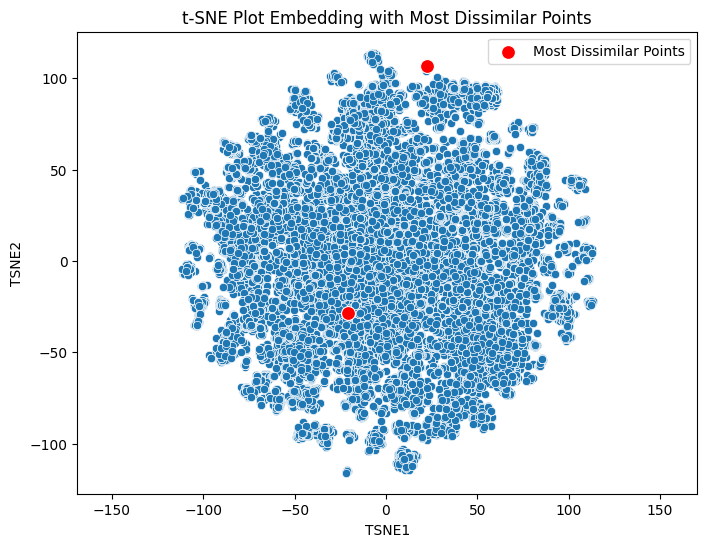

In [ ]:
# fig, ax = plt.subplots(figsize=(8,6))

# sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', palette='hls')

# most_dissimilar_indices = [12907, 21469]

# highlight_points = df_tsne.iloc[most_dissimilar_indices]

# sns.scatterplot(
#     data=highlight_points, 
#     x='TSNE1', 
#     y='TSNE2', 
#     color='red', 
#     s=100, 
#     label='Most Dissimilar Points', 
#     ax=ax
# )

# # Plot settings
# plt.title('t-SNE Plot Embedding with Most Dissimilar Points')
# plt.xlabel('TSNE1')
# plt.ylabel('TSNE2')
# plt.axis('equal')
# plt.legend()
# plt.show()

In [ ]:
# tsne = TSNE(n_components=3, random_state=123, n_iter=1000)
# tsne_results = tsne.fit_transform(X)

# df_tsne_3d = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2', 'TSNE3'])
# df_tsne_3d['id'] = df['id']

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [ ]:
# random_df_tsne_3d_5000 = df_tsne_3d.sample(1000, random_state=123)

Text(0.5, 0.92, '3D t-SNE Visualization')

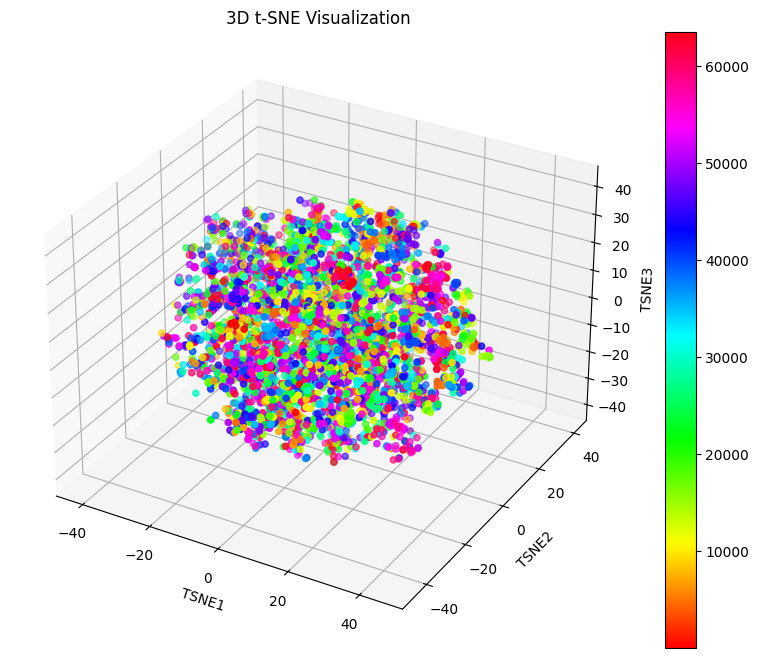

In [ ]:
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# sc = ax.scatter(random_df_tsne_3d_5000['TSNE1'], random_df_tsne_3d_5000['TSNE2'], random_df_tsne_3d_5000['TSNE3'], c=random_df_tsne_3d_5000['id'], cmap='hsv') 

# plt.colorbar(sc)
# ax.set_xlabel('TSNE1')
# ax.set_ylabel('TSNE2')
# ax.set_zlabel('TSNE3')
# plt.title('3D t-SNE Visualization')

In [ ]:
# inertia_values = []

# k_range = range(1, 10)

# for k in k_range:
#     kmeans = KMeans(n_clusters=k, random_state=123)
#     kmeans.fit(X)
#     inertia_values.append(kmeans.inertia_)

In [8]:
n_clusters = 6


In [9]:
kmeans = KMeans(n_clusters=n_clusters, random_state=123).fit(X)

In [10]:
kmeans_labels = kmeans.labels_

In [11]:
print(kmeans_labels)

[0 2 1 ... 5 0 1]


In [12]:
df['cluster'] = kmeans_labels
# df_tsne['cluster'] = kmeans_labels
# df_tsne_3d['cluster'] = kmeans_labels

In [13]:
# random_df_tsne_3d_5000['cluster'] = kmeans_labels[random_df_tsne_3d_5000.index]

In [14]:
# fig, ax = plt.subplots(figsize=(8,6))

# sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', palette='hls', hue='cluster')

# most_dissimilar_indices = [12907, 21469]

# highlight_points = df_tsne.iloc[most_dissimilar_indices]

# sns.scatterplot(
#     data=highlight_points, 
#     x='TSNE1', 
#     y='TSNE2', 
#     color='red', 
#     s=100, 
#     label='Most Dissimilar Points', 
#     ax=ax
# )

# # Plot settings
# plt.title('t-SNE Plot Embedding with Most Dissimilar Points')
# plt.xlabel('TSNE1')
# plt.ylabel('TSNE2')
# plt.axis('equal')
# plt.legend()
# plt.show()

In [15]:
# # fig = plt.figure(figsize=(10, 8))
# # ax = fig.add_subplot(111, projection='3d')

# # colors = {0: 'blue', 1: 'orange', 2: 'green',3:'red', 4: 'purple', 5: 'brown'}
# # cluster_colors = df_tsne_3d['cluster'].map(colors)

# # sc = ax.scatter(df_tsne_3d['TSNE1'], df_tsne_3d['TSNE2'], df_tsne_3d['TSNE3'], c=cluster_colors)

# # plt.colorbar(sc)
# # ax.set_xlabel('TSNE1')
# # ax.set_ylabel('TSNE2')
# # ax.set_zlabel('TSNE3')
# # plt.title('3D t-SNE Visualization with Clusters')

# # handles, labels = sc.legend_elements()
# # ax.legend(handles, [f'Cluster {i}' for i in range(n_clusters)], title="Clusters")

# # plt.show()

# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# # Map cluster labels to colors
# colors = {0: 'blue', 1: 'orange', 2: 'green', 3: 'red', 4: 'purple', 5: 'brown'}
# cluster_colors = random_df_tsne_3d_5000['cluster'].map(colors)

# # Scatter plot for all points
# sc = ax.scatter(random_df_tsne_3d_5000['TSNE1'], random_df_tsne_3d_5000['TSNE2'], random_df_tsne_3d_5000['TSNE3'], c=cluster_colors, alpha=0.7)

# # Highlight the two most dissimilar points
# most_dissimilar_indices = [12907, 21469]
# highlight_points = df_tsne_3d.iloc[most_dissimilar_indices]
# ax.scatter(
#     highlight_points['TSNE1'], 
#     highlight_points['TSNE2'], 
#     highlight_points['TSNE3'], 
#     color='black', 
#     s=100, 
#     label='Most Dissimilar Points'
# )

# # Add colorbar
# plt.colorbar(sc, ax=ax, pad=0.1, label='Cluster Colors')

# # Set labels and title
# ax.set_xlabel('TSNE1')
# ax.set_ylabel('TSNE2')
# ax.set_zlabel('TSNE3')
# plt.title('3D t-SNE Visualization with Clusters and Dissimilar Points')

# # Add legend for clusters and highlighted points
# handles, labels = sc.legend_elements()
# ax.legend(
#     handles + [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10)],
#     [f'Cluster {i}' for i in range(len(colors))] + ['Most Dissimilar Points'],
#     title="Legend",
#     loc='upper left'
# )

# # Show the plot
# plt.show()

In [16]:
source_counts_total = df['source'].value_counts()
print(source_counts_total)

source
kumparan         8571
okezone          7066
cnbcindonesia    4506
suara            4004
tempo            3642
cnnindonesia     3491
jawapos          1014
Name: count, dtype: int64


In [17]:
source_counts_per_cluster = df.groupby(['cluster', 'source']).size().unstack(fill_value=0)
print(source_counts_per_cluster)

source   cnbcindonesia  cnnindonesia  jawapos  kumparan  okezone  suara  tempo
cluster                                                                       
0                  487           991      347       990      978   1098    844
1                 1873           671      254      1513     1829    936   1247
2                  146           648      102      1760     1740    540    244
3                  115           137       55      2776      683    506     92
4                 1518           211       74       236      570    122    199
5                  367           833      182      1296     1266    802   1016


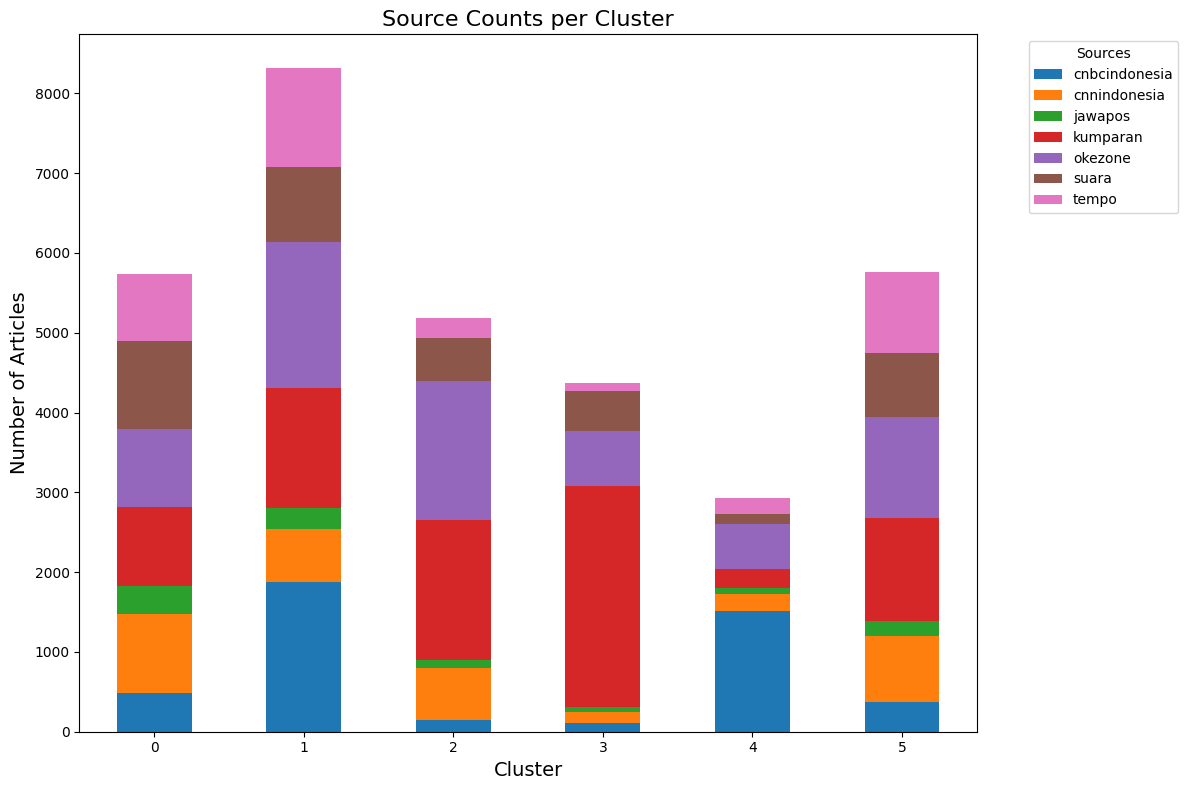

In [18]:
ax = source_counts_per_cluster.plot(kind='bar', stacked=True, figsize=(12, 8))
ax.set_title('Source Counts per Cluster', fontsize=16)
ax.set_xlabel('Cluster', fontsize=14)
ax.set_ylabel('Number of Articles', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Sources', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout() 
plt.show()

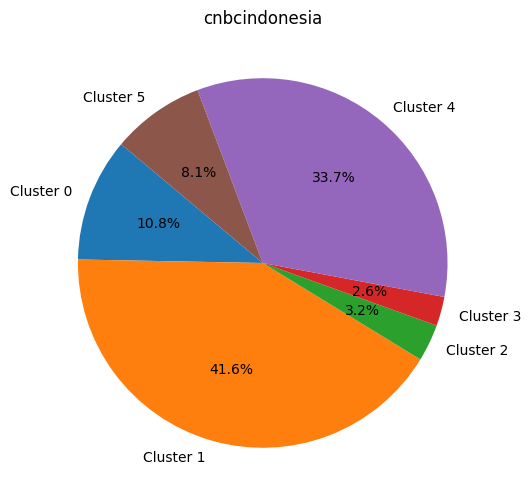

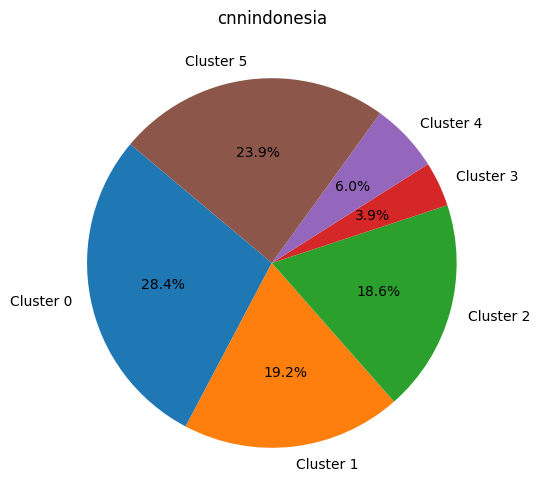

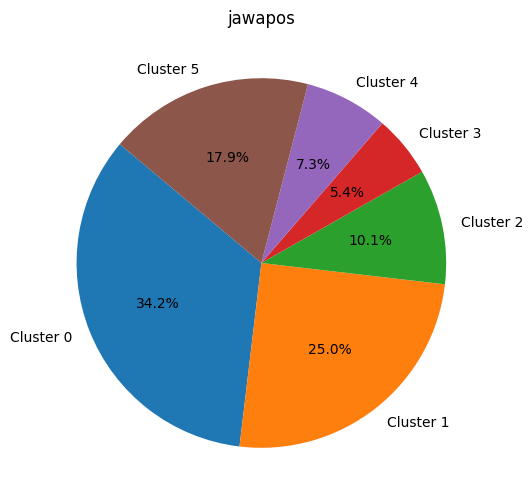

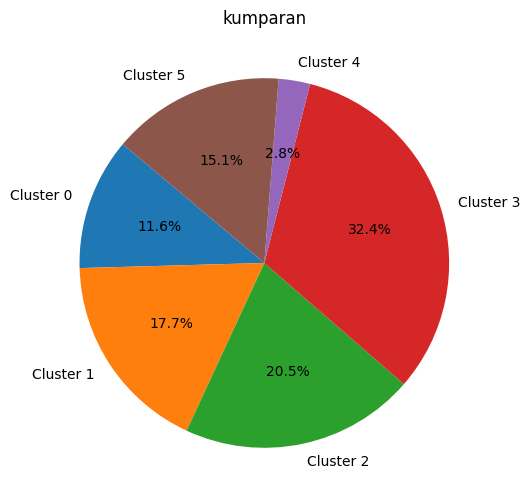

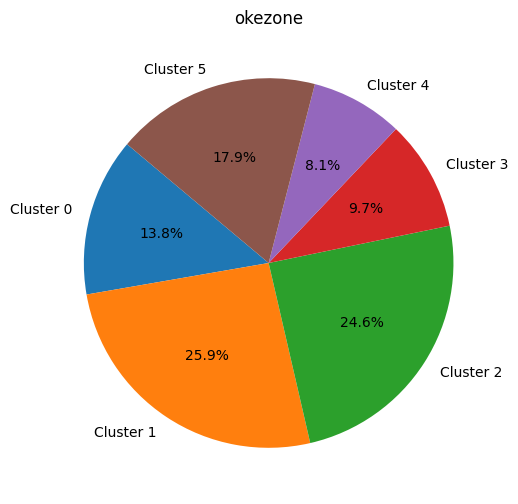

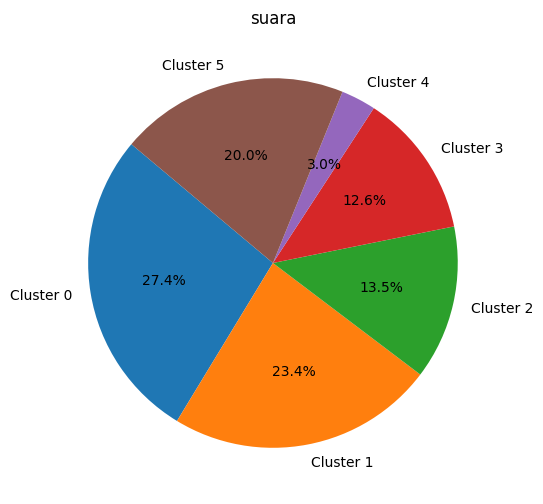

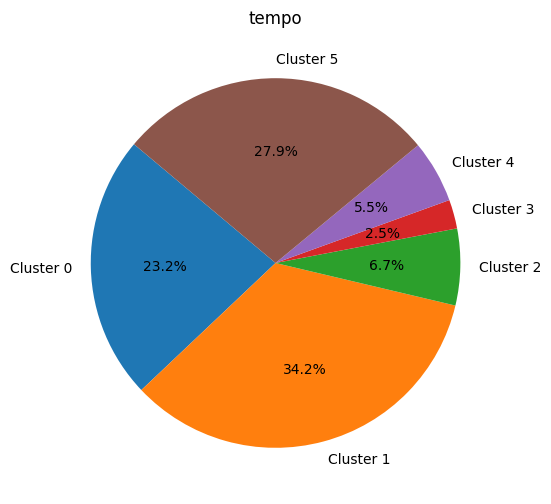

In [59]:
source_cluster_counts = pd.crosstab(df['source'], df['cluster'])

for source in source_cluster_counts.index:
    cluster_percentages = (source_cluster_counts.loc[source] / source_cluster_counts.loc[source].sum()) * 100
    
    plt.figure(figsize=(8, 6))
    plt.pie(
        cluster_percentages, 
        labels=[f'Cluster {i}' for i in range(n_clusters)], 
        autopct='%1.1f%%', 
        startangle=140
    )
    plt.title(source)
    plt.show()

In [60]:
source_majority_table = source_cluster_counts.idxmax(axis=1)

source_majority_table = source_majority_table.rename('Majority Cluster')

summary_table = pd.DataFrame({
    'Majority Cluster': source_majority_table,
    'Total Count': source_cluster_counts.sum(axis=1)
})

summary_table

,Majority Cluster,Total Count
source,,
cnbcindonesia,1,4506
cnnindonesia,0,3491
jawapos,0,1014
kumparan,3,8571
okezone,1,7066
suara,0,4004
tempo,1,3642


In [21]:
stopwordpd =  pd.read_csv('../data/stopwordbahasa.csv')
stopwordlist = stopwordpd['stopwords'].to_list()

In [22]:
def preprocess_text(text, stopwordlist):
    text = str(text)

    text = text.lower()

    text = re.sub(r'http\S+', '', text)

    text = re.sub(r'(@\w+|#\w+)', '', text)

    text = re.sub(r'[^a-zA-Z\s]', ' ', text)

    text = re.sub(r'\n', ' ', text)

    text = re.sub(r'\s{2,}', ' ', text)
    
    words = text.split()
    words = [word for word in words if word not in stopwordlist]

    return words

In [23]:
cluster_word_counts = {}

In [24]:
for cluster in df['cluster'].unique():
    cluster_articles = df[df['cluster'] == cluster]['content']
    
    all_words = []
    for article in cluster_articles:
        all_words.extend(preprocess_text(article, stopwordlist))
    
    word_counts = Counter(all_words)
    cluster_word_counts[cluster] = word_counts

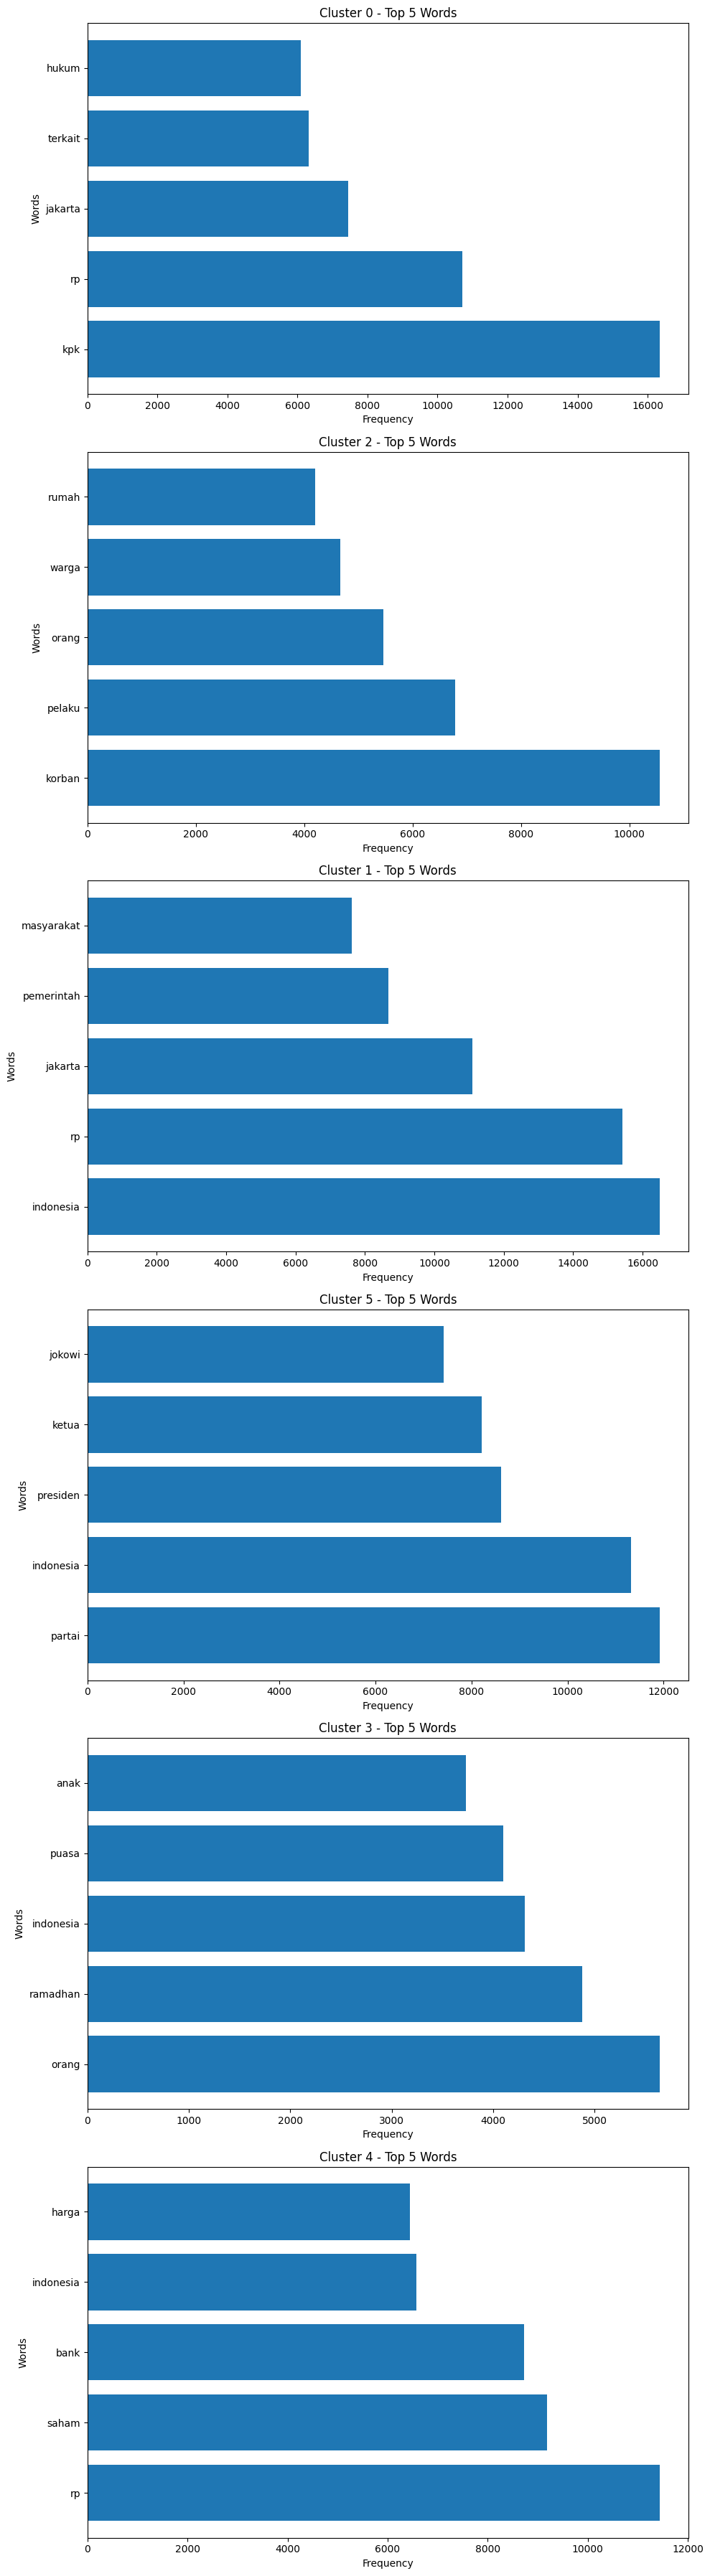

In [25]:
top_n = 5

fig, axes = plt.subplots(nrows=len(cluster_word_counts), figsize=(10, len(cluster_word_counts)*6))

for i, (cluster, word_counts) in enumerate(cluster_word_counts.items()):
    top_words = word_counts.most_common(top_n)
    words, counts = zip(*top_words)
    
    ax = axes[i] if len(cluster_word_counts) > 1 else axes
    ax.barh(words, counts)
    ax.set_title(f'Cluster {cluster} - Top {top_n} Words')
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Words')

plt.tight_layout()
plt.show()

In [26]:
newText = """
Ibu Gregorius Ronald Tannur, Meirizka Widjaja telah tiba di Kejaksaan Agung (Kejagung RI) untuk dialkukan pemindahan penahanan setelah sebelumnya dilakukan di Surabaya setelah ditetapkan sebagai tersangka kasus dugaan suap demi vonis bebas Ronald Tannur dalam kasus tewasnya Dini Sera. Dia tiba di Kejagung dengan dibawa membawa mobil tahanan, Kamis (14/11/2024). Meirizka menggunakan rompi tahanan Kejaksaan Agung dengan tangan diborgol dan rambut terurai serta wajah tertutupi masker. Tidak satu kata pun yang disampaikan oleh Meirizka saat digelandang dari mobil menuju ke lift Gedung Kartika, Kejaksaan Agung. Meirizka ikut dipindahkan penahanan ke Jakarta setelah sebelumnya terlebih dahulu dilakukan oleh tiga hakim. Kepala Pusat Penerangan Hukum Kejagung Harli Siregar membenarkan adanya perpindahan penahanan terhadap Meirizka. Harli mengatakan pemindahan terhadap Meirizka dilakukan untuk mempermudah pemeriksaan terhadap Meirizka dalam perkara itu. Saat ini penyidik Kejagung terus melakukan pendalaman terkait aliran uang suap tersebut. "Untuk efektivitas penyidikan," ujar Harli. Sebelumnya, Kejaksaan Agung menetapkan Meirizka sebagai tersangka tersangka suap kepada para hakim melalui kuasa hukum Ronald Tannur, Lisa Rahmat. Meirizka sebelumnya memang memiliki kedekatan dengan Lisa sejak dibangku sekolah. Usai adanya persetujuan Lisa sebagai kuasa hukum dari terdakwa Ronald Tannur, Meirizka meminta Lisa untuk mengupayakan kasus hukum dari anaknya tersebut ke Pengadilan Negeri Surabaya. "Lisa menemui tersangka Zarof Ricar agar dapat memilih para hakim yang mengadili kasus anaknya tersebut," katanya. Dalam pertemuan antara Lisa dan para hakim yang akan mengurus kasus tersebut, Lisa mengajukan permintaan sejumlah uang yang akan diberikan kepada sejumlah hakim agar perkara Ronald Tannur dapat dibebaskan. Pada awal masa persidangan, Meirizka memberikan sejumlah uang senilai Rp1,5 miliar kepada Lisa sebagai biaya pengurusan kasus terpidana Ronald Tannur. Selanjutnya, Lisa juga menalangi uang biaya pengurusan kasus tersebut sebesar Rp2 miliar. “Totalnya Rp3,5 miliar. Terhadap uang tersebut menurut LR diberikan kepada majelis hakim yang mengadili perkara yang dimaksud,” ucap Qohar. Meirizka terbukti melanggar pasal 5 ayat 1 atau 6 ayat 1 huruf a juncto 18 UU No. 31 Tahun 1999 tentang tindak pidana korupsi sebagaimana diubah UU 20 Tahun 2001 perubahan 31 Tahun 1999 tentang tipikor juncto pasal 55 ayat 1 ke-1 KUHP.
"""

# sample = df.sample().values[0]
# print(sample)
# newText_embedding = sample[4]
# newText_embedding

In [27]:
newText_embedding = embed_model.get_text_embedding(newText)

In [28]:
np_newText_embedding = np.array(newText_embedding, dtype=np.float32).reshape(1,-1)

In [29]:
predicted_cluster = kmeans.predict(np_newText_embedding)[0]

In [30]:
predicted_cluster

0

In [31]:
cluster_center = np.array(kmeans.cluster_centers_[predicted_cluster]).reshape(1,-1)
cluster_center

array([[ 0.0012315 , -0.0123498 ,  0.00816634, ..., -0.00622238,
        -0.00701369, -0.00827924]], dtype=float32)

In [32]:
cluster_docs = df[df['cluster'] == predicted_cluster]

In [33]:
similarities = cosine_similarity(
    [newText_embedding],
    list(cluster_docs['embedding'])
).flatten()

In [34]:
top_5_indices = np.argsort(similarities)[-5:][::-1]

In [35]:
top_5_docs = cluster_docs.iloc[top_5_indices]
top_5_docs

,id,source,title,content,embedding,cluster
11145,24554,kumparan,KPK Jerat Lagi Hakim Agung Gazalba Saleh Tersa...,kembali menjerat Hakim Agung sebagai tersangka...,"[-0.0045015393, 0.00836048, 0.015850773, -0.03...",0
30395,61525,cnnindonesia,Jaksa Nyatakan Pikir-pikir atas Vonis AG,Jaksa menyatakan sikap pikir-pikir atas vonis3...,"[0.0048993733, -0.0048369817, 0.0051161014, -0...",0
26260,52993,kumparan,Populer: Perempuan A Dituntut 4 Tahun Penjara;...,Berbagai peristiwa penting dan menarik terjadi...,"[-0.014549548, -0.023075823, 0.0076160925, -0....",0
32292,63566,kumparan,Sopir Audi Cium Kaki Ibu & Istri Hamil Usai Si...,Suasana haru terjadi usai sidang terdakwa Suge...,"[0.01118314, -0.016214557, 0.023612533, -0.024...",0
29908,60512,kumparan,Ryszard Sakit Hati Dilaporkan Tamara Bleszynsk...,Sidang gugatan terhadap kembali digelar di Pe...,"[0.00030634739, -0.01578909, 0.0059025567, -0....",0


In [ ]:
# top_words_cluster = cluster_word_counts[predicted_cluster].most_common(100)
# top_words = {word: count for word, count in top_words_cluster}

# for word, count in list(top_words.items())[:10]:
#     print(f"{word}: {count}")

In [37]:
# new_article_words = preprocess_text(newText, stopwordlist)

# new_article_word_counts = Counter(new_article_words)

# common_words_counts = {word: new_article_word_counts[word] for word in new_article_words if word in top_words}
# sorted_common_words_counts = sorted(common_words_counts.items(), key=lambda x: x[1], reverse=True)

# print(f"Predicted Cluster: {predicted_cluster}")
# print(f"Common words in the new article that match top words in Cluster {predicted_cluster}:")

# if sorted_common_words_counts:
#     for word, count in sorted_common_words_counts:
#         print(f"{word}: {count} / {top_words[word]}")
# else:
#     print("No common words found")

In [38]:
sample = df.sample().values[0]
print(sample)
newText_embedding = sample[4]
print(newText_embedding)

[28276 'kumparan'
 'Tembok Roboh saat Pembagian Bansos Tepung di Pakistan, 1 Orang Tewas'
 'Pemerintah memberikan bantuan sosial ( ) berupa tepung gratis ke warganya yang saat ini dilanda inflasi. Pembagian tepung itu dilakukan di pasar lokal selama Ramadhan. Ratusan orang berdesakan untuk mendapatkan tepung gratis itu. Nahas sebuah tembok yang mereka duduki roboh hingga menewaskan 1 orang. "Sembilan orang terinjak-injak dan dibawa ke rumah sakit di mana satu orang meninggal," kata Muhammad Arif, kepala polisi Charsadda di provinsi barat laut Khyber Pakhtunkhwa tempat insiden itu terjadi, dikutip dari , Kamis (23/3). Pihak berwenang belum mengetahui penyebab tembok itu runtuh. Harga kebutuhan pokok di Pakistan meroket dalam beberapa bulan terakhir. Negara itu menghadapi inflasi tertinggi dalam 50 tahun terakhir.'
 array([-0.00411587, -0.01679433, -0.00553525, ..., -0.00161045,
        -0.0075237 , -0.0044368 ])                               2]
[-0.00411587 -0.01679433 -0.00553525 ... -

In [39]:
newText = """
TTS
"""
newText_embedding = embed_model.get_text_embedding(newText)

In [40]:
np_newText_embedding = np.array(newText_embedding, dtype=np.float32).reshape(1,-1)
predicted_cluster = kmeans.predict(np_newText_embedding)[0]
predicted_cluster

3

In [41]:
similarities = cosine_similarity(
    [newText_embedding],
    list(df['embedding'])
)

In [42]:
similarities = list(enumerate(similarities[0]))
similarities = sorted(similarities, key=lambda x: x[1], reverse=False) # True if take most similar
similarities = similarities[:10]

In [43]:
pd.set_option('display.max_colwidth', None)

In [44]:
article_idx = [i[0] for i in similarities]
similarity_values = [i[1] for i in similarities]

recommendations = df.iloc[article_idx][['title', 'source', 'cluster']]
recommendations['cosine_similarity'] = similarity_values
pd.set_option('display.max_colwidth', None)
recommendations

,title,source,cluster,cosine_similarity
30524,"Keuangan Organisasi Kampus: Mengapa Pendapatan Rendah, Pengeluaran Dana Tinggi?",kumparan,3,0.630595
2789,Tujuan Nikah dalam Islam Menurut Alquran dan Hadist,kumparan,3,0.645506
7055,Contoh Soal Distribusi Poisson dan Jawabannya,kumparan,3,0.646814
5166,Apakah Sushi Benar-benar Bisa Menjadi Pilihan Makanan Diet?,kumparan,3,0.646949
22218,"6 Negara yang Dikenal sebagai Bangsa Penjajah, Nomor 1 Kuasai Seperempat Dunia",okezone,3,0.647164
7092,2 Contoh Soal Jurnal Penyesuaian dalam Perusahaan Jasa,kumparan,3,0.647277
15608,Jalur Pejalan Kaki Terpanjang di Dunia: Tempuh 22 Ribu Km dan Selesai 587 Hari,kumparan,3,0.647333
14091,Pengertian Supervisi Pendidikan beserta Fungsinya,kumparan,3,0.647871
11071,"Endometriosis Pengaruhi Kualitas Seks, Memangnya Benar?",kumparan,3,0.648996
9012,"Endometriosis pada Perempuan, Apa Saja Dampaknya?",kumparan,3,0.649998


In [45]:
newText

'\nTTS\n'

In [46]:
correct_predictions = 0
total_samples = 10
increment = 1
accuracy_progress = []
matches_per_sample = []

In [47]:
for i in range(1, total_samples + 1):
    sample = df.sample().values[0]
    newText_embedding = sample[4]
    np_newText_embedding = np.array(newText_embedding, dtype=np.float32).reshape(1, -1)
    
    predicted_cluster = kmeans.predict(np_newText_embedding)[0]
    similarities = cosine_similarity([newText_embedding], list(df['embedding']))
    similarities = list(enumerate(similarities[0]))
    similarities = sorted(similarities, key=lambda x: x[1], reverse=True)[:10]
    article_idx = [i[0] for i in similarities]
    recommendations = df.iloc[article_idx]
    
    recommended_clusters = recommendations['cluster'].values
    correct_predictions += np.sum(recommended_clusters == predicted_cluster)
    
    if i % increment == 0:
        accuracy = correct_predictions / (i * 10)  
        accuracy_progress.append((i, accuracy))

    matches = np.sum(recommended_clusters == predicted_cluster)
    matches_per_sample.append(matches)

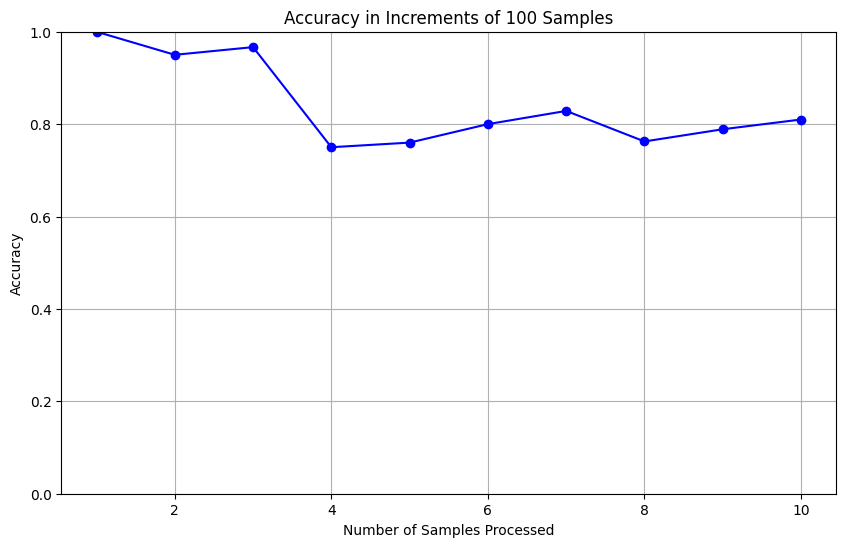

In [48]:
x = [point[0] for point in accuracy_progress]
y = [point[1] for point in accuracy_progress]

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-', color='b')
plt.title('Accuracy in Increments of 100 Samples')
plt.xlabel('Number of Samples Processed')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

In [49]:
similarity_matrix = cosine_similarity(list(df['embedding']), list(df['embedding']))
np.fill_diagonal(similarity_matrix, np.inf)
min_similarity = np.min(similarity_matrix)
row, col = np.unravel_index(np.argmin(similarity_matrix), similarity_matrix.shape)
print(f"The most dissimilar pair of embeddings are at indices {row} and {col}")
print(f"Cosine similarity: {min_similarity}")

print("Text 1:", df.iloc[row]['title'])  
print("Text 2:", df.iloc[col]['title'])

The most dissimilar pair of embeddings are at indices 12907 and 21469
Cosine similarity: 0.6644615229792243
Text 1: 3 Kebaikan yang Diberikan Pohon Apel
Text 2: Hasil Kualifikasi & Sprint Race MotoGP Argentina 2023


In [50]:
distance_matrix = euclidean_distances(list(df['embedding']), list(df['embedding']))
np.fill_diagonal(distance_matrix, -np.inf)
max_distance = np.max(distance_matrix)
row, col = np.unravel_index(np.argmax(distance_matrix), distance_matrix.shape)

print(f"The most dissimilar pair of embeddings are at indices {row} and {col}")
print(f"Euclidean distance: {max_distance}")

print("Text 1:", df.iloc[row]['id']) 
print("Text 2:", df.iloc[col]['id'])

The most dissimilar pair of embeddings are at indices 12907 and 21469
Euclidean distance: 0.8191928856235674
Text 1: 27961
Text 2: 44581


In [52]:
df.iloc[12907]

id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [ ]:
documents = []
for index, row in df.iterrows():
    document = Document(
    text=row['content'],
    doc_id=str(row['id']),
    metadata={
        'title': row['title'],
    },
    embedding=ast.literal_eval(row['embedding'])
    )
    documents.append(document)

def createVectorIndex(documents):
    index = VectorStoreIndex.from_documents(documents)
    index.storage_context.persist(persist_dir="../storage")

def loadVectorIndex():
    storage_context = StorageContext.from_defaults(persist_dir="../storage")
    index = load_index_from_storage(storage_context)
    return index
createVectorIndex(documents)
index = loadVectorIndex()
retriever = VectorIndexRetriever(
    index=index,
    similarity_top_k=10,
)

response_synthesizer = get_response_synthesizer()

class CustomRetrieverQueryEngine(RetrieverQueryEngine):
    def query(self, query_text: str):
        retriever_results = self.retriever.retrieve(query_text)
        
        print("Retrieved Documents with Bias Metadata:")
        for doc in retriever_results:
            print(doc)
            print(doc.metadata['bias'])
            print("-------")

        return super().query(query_text)

query_engine = CustomRetrieverQueryEngine(
    retriever=retriever,
    response_synthesizer=response_synthesizer,
    node_postprocessors=[SimilarityPostprocessor(similarity_cutoff=0.7)],
)

response = query_engine.query("What's this news about, and what's it's bias label? Explain why the bias label is so, and what it highlights that makes it get the bias label." + query_str)
print(response)